In [2]:
import pandas as pd

ground_truth_df = pd.read_csv('ground_truth.csv', index_col=0)
ground_truth_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
ground_truth_df.head()


,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092256,0,SP95550,Uterus-AdenoCA
1,0.063790,1,SP95550,Uterus-AdenoCA
2,0.158236,4,SP95550,Uterus-AdenoCA
3,0.099229,16,SP95550,Uterus-AdenoCA
4,0.586489,44,SP95550,Uterus-AdenoCA


In [3]:
experiment_df = pd.read_csv('/home/amso/Documents/mutation_signatures/output/experiment.csv', index_col=0)
experiment_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063734,1,SP95550,Uterus-AdenoCA
2,0.158121,4,SP95550,Uterus-AdenoCA
3,0.099349,16,SP95550,Uterus-AdenoCA
4,0.586503,44,SP95550,Uterus-AdenoCA


In [4]:
experiment_sig_profiler_df = pd.read_csv('experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063844,1,SP95550,Uterus-AdenoCA
2,0.158231,4,SP95550,Uterus-AdenoCA
3,0.099239,16,SP95550,Uterus-AdenoCA
4,0.586393,44,SP95550,Uterus-AdenoCA


In [5]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [11]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    try:
        actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    except:
        print(f'error: patient', patient)
        continue
    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)

    results.append({
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


error: patient SP86775
error: patient SP85818


In [12]:
results_df['Sensitivity_our'].mean(), results_df['Sensitivity_sig_profile'].mean()

(0.9896699192868329, 0.9892055460902588)

In [13]:
results_df['Specificity_our'].mean(), results_df['Specificity_sig_profile'].mean()

(0.9963731161814123, 0.9963115913065274)

In [14]:
import seaborn as sns

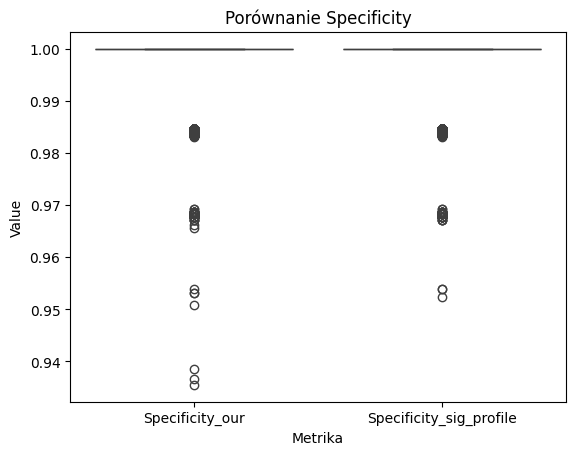

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


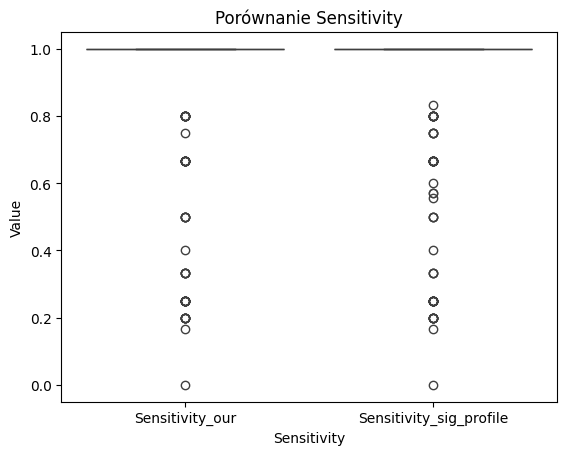

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [17]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
      signatures_false_negatives_our.append({'Pacjent': row['Pacjent'], 'signature_false_negatives_our': item})
    for item in row['false_positives_our']:
      signatures_false_positives_our.append({'Pacjent': row['Pacjent'], 'signature_false_positives_our': item})
    
    for item in row['false_negatives_sig_profile']:
      signatures_false_negatives_sig_profile.append({'Pacjent': row['Pacjent'], 'signature_false_negatives_sig_profile': item})
    for item in row['false_positives_sig_profile']:
      signatures_false_positives_sig_profile.append({'Pacjent': row['Pacjent'], 'signature_false_positives_sig_profile': item})

# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby('signature_false_negatives_our').count().reset_index()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby('signature_false_positives_our').count().reset_index()
grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby('signature_false_negatives_sig_profile').count().reset_index()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby('signature_false_positives_sig_profile').count().reset_index()

In [64]:
grouped_fn_sig_profile['Pacjent'].sum()

131

In [63]:
grouped_fn_our['Pacjent'].sum()

118

In [66]:
grouped_fp_our['Pacjent'].sum()

635

In [68]:
grouped_fn_sig_profile['Pacjent'].sum()

131

In [69]:
grouped_fn_our['Pacjent'].sum()

118

In [73]:
combined_df

,signature_false_negatives_our,Pacjent_x,signature_false_negatives_sig_profile,Pacjent_y
0,5.0,4.0,5.0,5.0
1,10.0,2.0,10.0,2.0
2,14.0,1.0,14.0,1.0
3,15.0,26.0,15.0,25.0
4,17.0,1.0,17.0,1.0
5,19.0,3.0,19.0,3.0
6,22.0,3.0,22.0,3.0
7,30.0,1.0,0.0,0.0
8,33.0,7.0,33.0,7.0
9,34.0,19.0,34.0,16.0


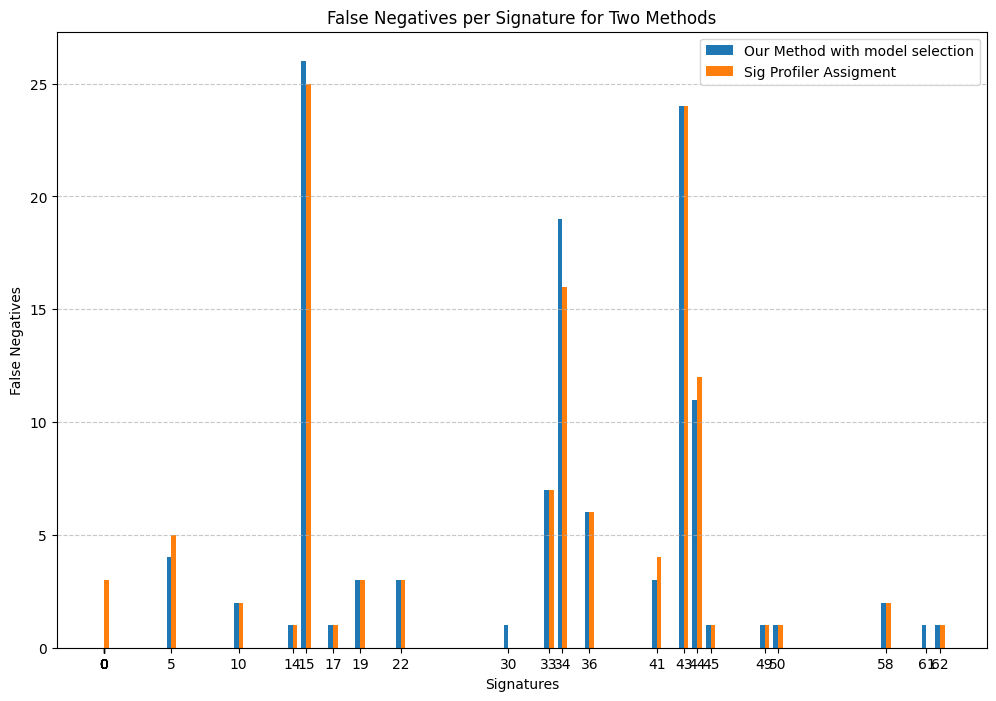

In [86]:
combined_df = pd.merge(grouped_fn_our, grouped_fn_sig_profile, left_on='signature_false_negatives_our', right_on='signature_false_negatives_sig_profile', how='outer').fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

index = combined_df['signature_false_negatives_our']

bar1 = ax.bar(index - bar_width/2, combined_df['Pacjent_x'], bar_width, label='Our Method with model selection')
bar2 = ax.bar(index + bar_width/2, combined_df['Pacjent_y'], bar_width, label='Sig Profiler Assigment')

ax.set_xlabel('Signatures')
ax.set_ylabel('False Negatives')
ax.set_title('False Negatives per Signature for Two Methods')
ax.set_xticks(index)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


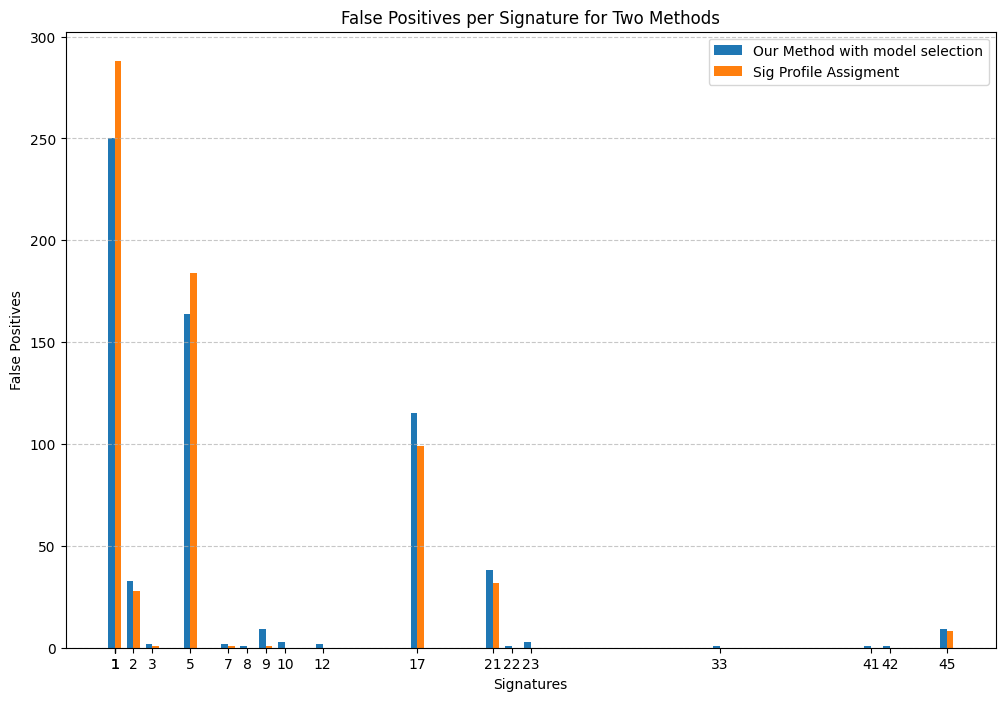

In [88]:
combined_df = pd.merge(grouped_fp_our, grouped_fp_sig_profile, left_on='signature_false_positives_our', right_on='signature_false_positives_sig_profile', how='outer').fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

index = combined_df['signature_false_positives_our'] + 1

bar1 = ax.bar(index - bar_width/2, combined_df['Pacjent_x'], bar_width, label='Our Method with model selection')
bar2 = ax.bar(index + bar_width/2, combined_df['Pacjent_y'], bar_width, label='Sig Profile Assigment')

ax.set_xlabel('Signatures')
ax.set_ylabel('False Positives')
ax.set_title('False Positives per Signature for Two Methods')
ax.set_xticks(index)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [89]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_df.groupby('Sample Names').apply(create_vector)

correlations_our = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlations_our[sample_name] = correlation
    except:
        print(sample_name)
correlations_df_our = pd.DataFrame(list(correlations_our.items()), columns=['Sample Names', 'Correlation'])

SP85818
SP86775


In [90]:
groups_df1['SP85818']

array([0.1634606 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.21937928,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61716012, 0.        , 0.        ,
       0.        , 0.        ])

In [91]:
groups_df1['SP86775']

array([0.05807024, 0.        , 0.        , 0.        , 0.94192976,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [92]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlations_sig_profile[sample_name] = correlation
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

In [93]:
correlations_df_sig_profile.describe()

,Correlation
count,2769.000000
mean,0.989783
std,0.080674
min,-0.030041
25%,0.999999
50%,1.000000
75%,1.000000
max,1.000000


In [94]:
correlations_df_our.describe()

,Correlation
count,2767.000000
mean,0.989335
std,0.084374
min,-0.035164
25%,0.999987
50%,0.999999
75%,1.000000
max,1.000000


In [ ]:
import pandas as pd 



import numpy as np
from utils import save_to_dataframe

tumorBRCA = np.genfromtxt('data/M.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')
SigProfilerAssignment = pd.read_csv('/home/amso/Documents/data_comparation/output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')


ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), SigProfilerAssignment.iloc[i]['Samples'], df.iloc[i]['Cancer Types'])
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('experiment_sig_profiles.csv')

In [56]:
df = pd.read_csv('/home/amso/Documents/data_comparation/data/M.csv', sep='\t')
m = pd.read_csv('/home/amso/Documents/mutation_signatures/data/COSMIC_v3_SBS_GRCh37.txt', sep='\t')

In [58]:
pd.concat([m[['Type']], df], axis=1).drop(columns=['Unnamed: 0']).to_csv('/home/amso/Documents/data_comparation/data/M.csv', sep='\t')

In [47]:
import pandas as pd 

df = pd.read_csv('data/WGS_signatures__sigProfiler_SBS_signatures_2019_05_22.modified.csv', sep='\t', index_col=0)

In [49]:
df.index = m['Type']

In [52]:
df.to_csv('data/WGS_signatures__sigProfiler_SBS_signatures_2019_05_22.modified.csv', sep='\t')